In [3]:
#1. Prepare Data for Analysis
#Begin by importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore
import seaborn as sns
from statsmodels.stats.stattools import medcouple, robust_kurtosis

In [4]:
#Read the csv file and store it as a DataFrame named df
df=pd.read_csv('diabetic_data.csv')

In [ ]:
#Check for missing values in the DataFrame.
df.isnull().sum() #used .isnull() function to check for missing values and count missing values.

In [ ]:
#Perform descriptive statistical analysis for numerical features
print("Dataframe contains:", df.shape) #df dataframe contains 7560 rows and 6 columns
df.describe() #display descriptive statistics

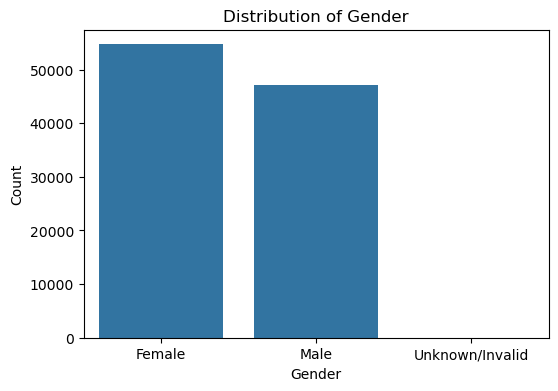

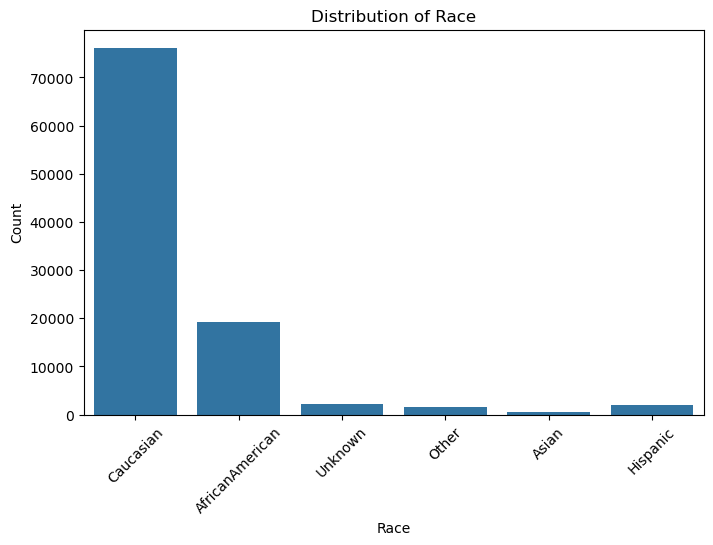

In [7]:
#Visualize the distribution of categorical features race and gender
 
# Visualize gender distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', data=df)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Visualize race distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='race', data=df)
plt.title('Distribution of Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=45) # Rotate labels if they overlap
plt.show()

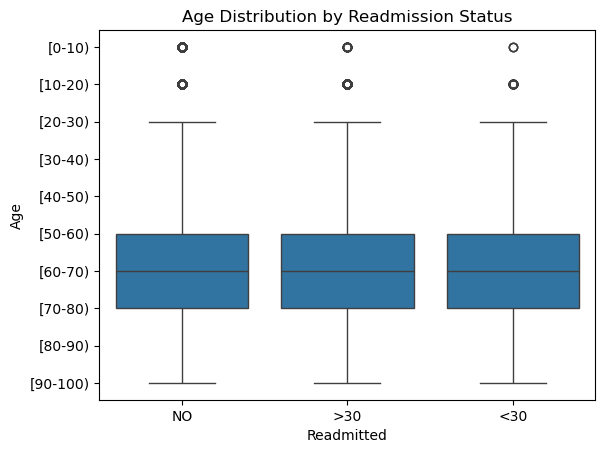

In [50]:
#Explore the relationship between readmission status and age
sns.boxplot(x='readmitted', y='age', data=df)
plt.title('Age Distribution by Readmission Status')
plt.xlabel('Readmitted')
plt.ylabel('Age')
plt.show()

In [19]:
#Investigate correlations between numerical features
correlation = df['num_lab_procedures'].corr(df['num_procedures'])
print(f"Correlation Coefficient between num_lab_procedures and num_procedures: {correlation}")

correlation = df['num_medications'].corr(df['num_procedures'])
print(f"Correlation Coefficient between num_medications and num_procedures: {correlation}")

Correlation Coefficient between num_lab_procedures and num_procedures: 0.05806557121908067
Correlation Coefficient between num_medications and num_procedures: 0.38576727284855306


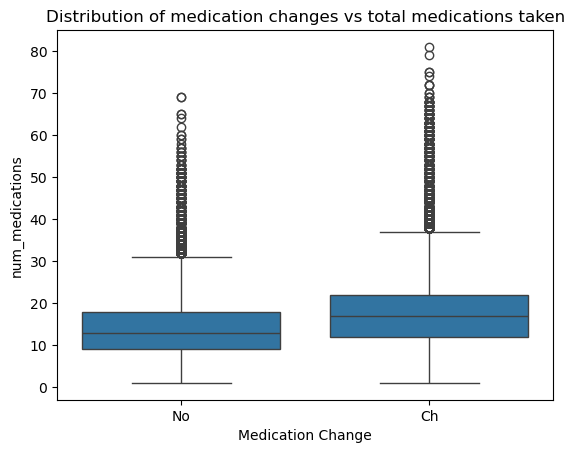

In [21]:
#Analyze the distribution of medication changes and total medications taken
sns.boxplot(x='change', y='num_medications', data=df)
plt.title('Distribution of medication changes vs total medications taken')
plt.xlabel('Medication Change')
plt.ylabel('num_medications')
plt.show()

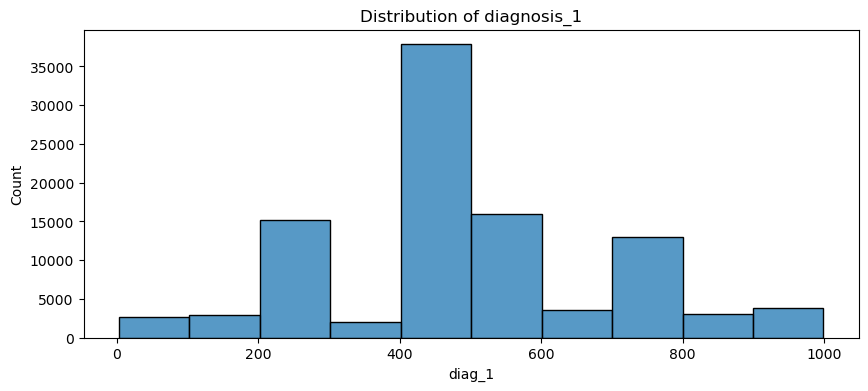

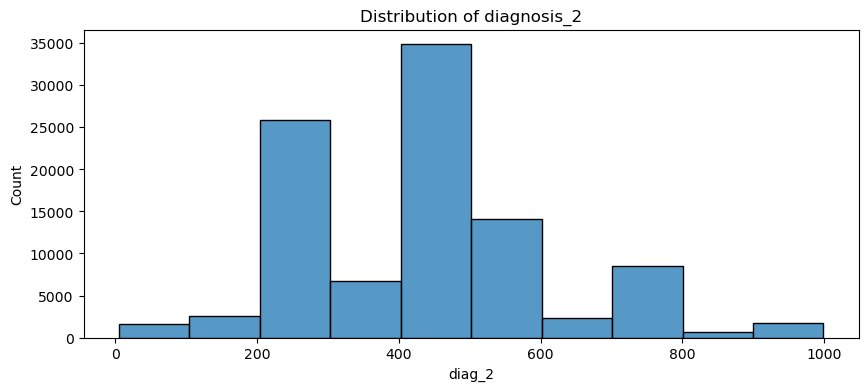

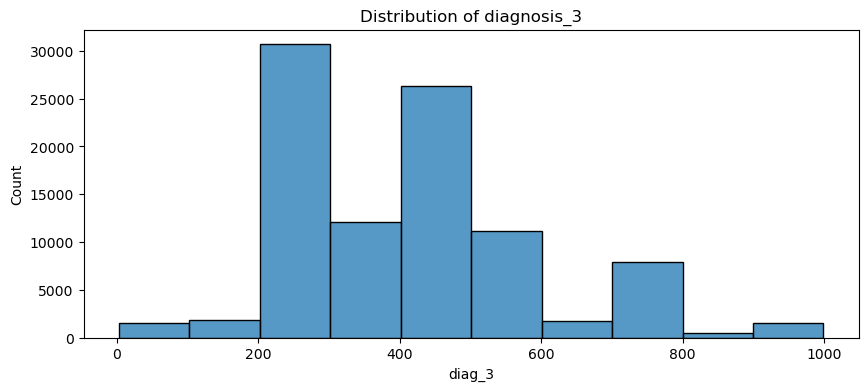

In [23]:
#Examine the distribution of diagnoses categories
df['diag_1'] = pd.to_numeric(df['diag_1'], errors='coerce') #convert datatype of numeric
plt.figure(figsize=(10, 4))
sns.histplot(x='diag_1', data=df, binwidth = 100)
plt.title('Distribution of diagnosis_1')
plt.xlabel('diag_1')
plt.ylabel('Count')
plt.show()

df['diag_2'] = pd.to_numeric(df['diag_2'], errors='coerce')
plt.figure(figsize=(10, 4))
sns.histplot(x='diag_2', data=df, binwidth = 100)
plt.title('Distribution of diagnosis_2')
plt.xlabel('diag_2')
plt.ylabel('Count')
plt.show()

df['diag_3'] = pd.to_numeric(df['diag_3'], errors='coerce')
plt.figure(figsize=(10, 4))
sns.histplot(x='diag_3', data=df, binwidth = 100)
plt.title('Distribution of diagnosis_3')
plt.xlabel('diag_3')
plt.ylabel('Count')
plt.show()

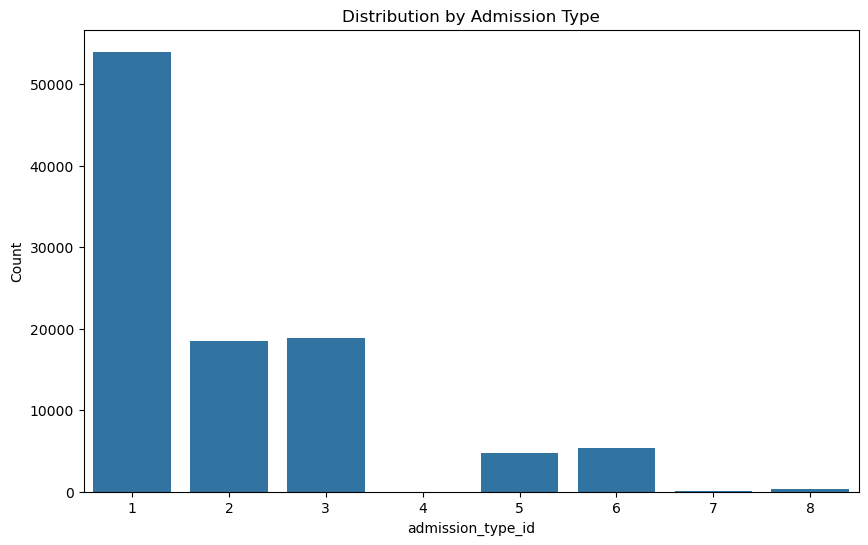

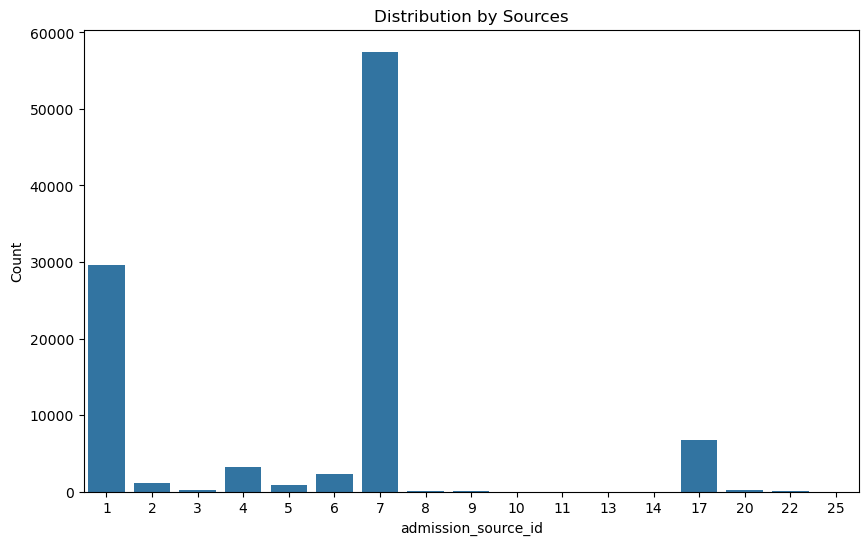

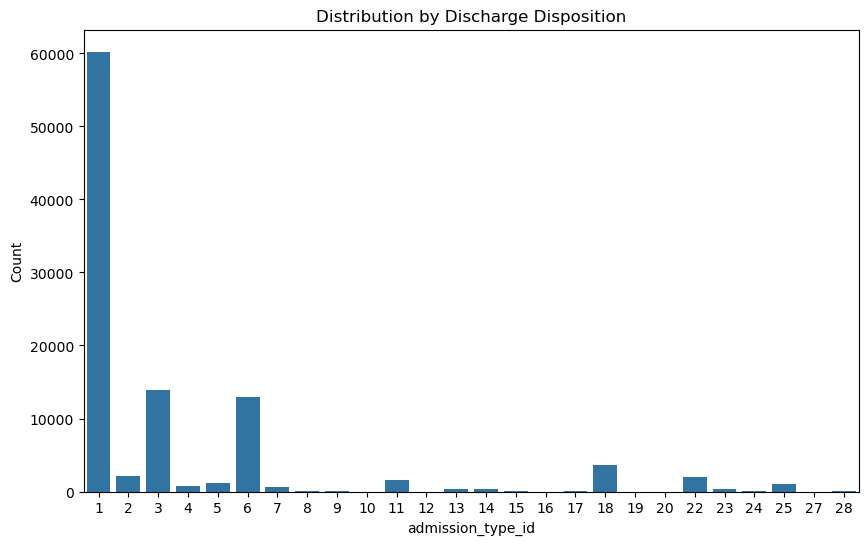

In [25]:
#Explore the distribution of patients across admission types, sources, and discharge dispositions
# Distribution of patients across admission types
plt.figure(figsize=(10, 6))
sns.countplot(x='admission_type_id', data=df)
plt.title('Distribution by Admission Type')
plt.xlabel('admission_type_id')
plt.ylabel('Count')
plt.show()

# Distribution of patients across sources
plt.figure(figsize=(10, 6))
sns.countplot(x='admission_source_id', data=df)
plt.title('Distribution by Sources')
plt.xlabel('admission_source_id')
plt.ylabel('Count')
plt.show()

# Distribution of patients by discharge disposition
plt.figure(figsize=(10, 6))
sns.countplot(x='discharge_disposition_id', data=df)
plt.title('Distribution by Discharge Disposition')
plt.xlabel('admission_type_id')
plt.ylabel('Count')
plt.show()

In [27]:
#Identify and visualize any outliers in the dataset, especially in numerical features

# Calculate the range for all numeric column
int_columns = df.select_dtypes(include=['int64', 'Int64']) #get columns with integer datatypes
for col in int_columns.columns:
    col_range = int_columns[col].max() - int_columns[col].min()
    print(f"Range of {col}: {col_range}")

#Calculate standard deviation
std_dev = int_columns.std()
print("Standard deviation:\n", std_dev)


# Calculate Q1 (25th percentile) for the selected columns
Q1 = int_columns.quantile(0.25)
# Calculate Q3 (75th percentile) for the selected columns
Q3 = int_columns.quantile(0.75)
#Calculate interquartile range
IQR = Q3 - Q1
print("Interquartile Range:",IQR)


Range of encounter_id: 443854700
Range of patient_nbr: 189502484
Range of admission_type_id: 7
Range of discharge_disposition_id: 27
Range of admission_source_id: 24
Range of time_in_hospital: 13
Range of num_lab_procedures: 131
Range of num_procedures: 6
Range of num_medications: 80
Range of number_outpatient: 42
Range of number_emergency: 76
Range of number_inpatient: 21
Range of number_diagnoses: 15
Standard deviation:
 encounter_id                1.026403e+08
patient_nbr                 3.869636e+07
admission_type_id           1.445403e+00
discharge_disposition_id    5.280166e+00
admission_source_id         4.064081e+00
time_in_hospital            2.985108e+00
num_lab_procedures          1.967436e+01
num_procedures              1.705807e+00
num_medications             8.127566e+00
number_outpatient           1.267265e+00
number_emergency            9.304723e-01
number_inpatient            1.262863e+00
number_diagnoses            1.933600e+00
dtype: float64
Interquartile Range: enco

In [ ]:
#Calculate mean, median and mode of a column
mean = df['num_medications'].mean()
print(f"Mean of column num_medications: {mean}")

median = df['num_medications'].median()
print(f"Mean of column num_medications: {median}")

mode = df['num_medications'].mode()
print(f"Mean of column num_medications: {mode}")

In [ ]:
#Write an analysis report on performing exploratory data analysis (EDA) using Python in the context of building a fraud detection system for the healthcare management system

Mean: The mean of the column num_medications is approximately 16. It represents the average value of the elements in the dataset.

Median: The median of the column num_medications is 15. It represents the middle value of the dataset when the elements are arranged in ascending order. Half of the data points are above this value, and half are below it.

Mode: The mode of the column num_medications is 0 and 13. It represents the most frequently occurring value in the dataset.

Range: The range of the column num_medications is 80, the column num_lab_procedures is 131 and column num_procedues is 6 . It is the difference between the maximum and minimum values in the dataset, indicating the spread or variation of the data.

Standard Deviation: The standard deviation of the column num_medications is approximately 8.12. It measures the average amount of variation or dispersion from the mean. A higher standard deviation indicates greater data dispersion.

Interquartile Range (IQR): The IQR of the column num_medications is 1. It represents the range of the middle 50% of the data and provides a measure of variability that is less sensitive to outliers than the range.

Correlation Coefficient: The correlation coefficient between num_lab_procedures and num_procedures: 0.05806557121908067. The correlation coefficient between num_medications and num_procedures: 0.38576727284855306.It quantifies the strength and direction of the linear relationship between two variables. A value close to -1 indicates a strong negative linear correlation.
